<a href="https://colab.research.google.com/github/ArkaPrabhaChowdhury/Fake_News_Detection/blob/main/FakeNews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
import string
import re
import nltk
from nltk.util import pr
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from nltk.corpus import stopwords
stemmer=nltk.SnowballStemmer("english")
nltk.download('stopwords')
stopword=set(stopwords.words('english'))
import pickle

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**READ INPUT FILE**

In [ ]:
data=pd.read_csv("fake_or_real_news.csv")


**DATA CLEANING/WRANGLING**

In [ ]:
data.duplicated().sum()

225

In [ ]:
data=data.drop_duplicates()

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

Unnamed: 0         1
title            385
text             641
label            815
Unnamed: 4      7252
                ... 
Unnamed: 136    7569
Unnamed: 137    7569
Unnamed: 138    7569
Unnamed: 139    7569
Unnamed: 140    7569
Length: 141, dtype: int64

In [ ]:
data["label"]=data["label"].map({"REAL":1,"FAKE":0}) 

In [ ]:
data=data[['title','text','label']]

In [ ]:
data=data.dropna()

In [ ]:
display(data)


,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0.0
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0.0
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1.0
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0.0
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1.0
...,...,...,...
7790,State Department says it can't find emails fro...,The State Department told the Republican Natio...,1.0
7791,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,0.0
7792,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,0.0
7793,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",1.0


**DATA ANALYSIS**

In [ ]:
data.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder=LabelEncoder()

In [ ]:
data.shape

(6315, 3)

In [ ]:
data.nunique()


title    6236
text     6040
label       2
dtype: int64

In [ ]:
data.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0.0
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0.0
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1.0
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0.0
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6315 entries, 0 to 7794
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   6315 non-null   object 
 1   text    6315 non-null   object 
 2   label   6315 non-null   float64
dtypes: float64(1), object(2)
memory usage: 197.3+ KB


**DATA VISUALIZATION**

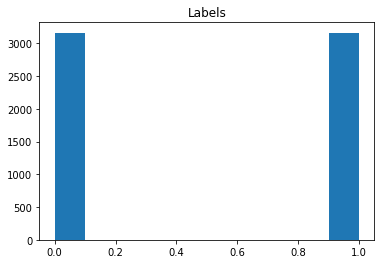

In [ ]:
plt.hist(data['label'],bins=10)
plt.title("Labels")
plt.show()

In [ ]:
import plotly as px

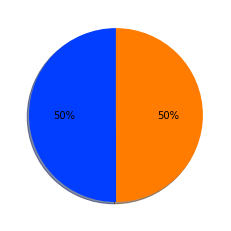

In [ ]:
colors=sns.color_palette('bright')
plt.pie(data['label'].value_counts(),colors=colors,autopct='%0.0f%%',shadow='True',startangle=90)
plt.show()

In [ ]:
fig=px.hist_series(data,x='label',color='label')
fig.show()

**DATA CLEAN**

In [ ]:
def clean(text):
  text=str(text).lower()
  text=re.sub('\[.*?\]','',text)
  text=re.sub('https?://\S+|www.\.\S+','',text)
  text=re.sub('<.*?>+','',text)
  text=re.sub('[%s]'%re.escape(string.punctuation),'',text)
  text=re.sub('\n','',text)
  text=re.sub('\w*\d\w*','',text)
  text=[word for word in text.split(' ') if word not in stopword]
  text="".join(text)
  text=[stemmer.stem(word) for word in text.split(' ')]
  text=" ".join(text)
  return text
data["text"]=data["text"].apply(clean)
data["title"]=data["title"].apply(clean)

In [ ]:
x=np.array(data["text"])

y=np.array(data["label"])
print(x)

["danielgreenfieldshillmanjournalismfellowfreedomcenternewyorkwriterfocusingradicalislamfinalstretchelectionhillaryrodhamclintongonewarfbiword“unprecedented”thrownaroundoftenelectionoughtretiredit'sstillunprecedentednomineemajorpoliticalpartygowarfbithat'sexactlyhillarypeopledonecomapatientswakingwatchinghourcnnhospitalbedswouldassumefbidirectorjamescomeyhillary'sopponentelectionfbiattackeveryoneobamacnnhillary'speoplecirculatedletterattackingcomeycurrentlymediahitpieceslambastingtargetingtrumpwouldn'tsurprisingclintonsalliesstartrunningattackadsfbifbi'sleadershipwarnedentireleftwingestablishmentformlynchmobcontinuegoinghillaryfbi'scredibilityattackedmediademocratspreemptivelyheadresultsinvestigationclintonfoundationhillaryclintoncovertstrugglefbiagentsobama'sdojpeoplegoneexplosivelypublicnewyorktimescomparedcomeyjedgarhooverbizarreheadline“jamescomeyrolerecallshoover'sfbifairlynot”practicallyadmitsfrontit'sspoutingnonsensebostonglobepublishedcolumncallingcomey'sresignationoutdonetimee

In [ ]:
#Tfidf=Term frequency inverse document frequency
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(x)
vectorizer.get_feature_names_out()
print(X.shape)

(6315, 136176)


In [ ]:
first_vector=X[0]
dataframe=pd.DataFrame(first_vector.T.todense(),index=vectorizer.get_feature_names(),columns=["tfidf"])
dataframe.sort_values(by=["tfidf"],ascending=False)

,tfidf
suglyunprecedentedscenemayalsolaststandhillaryclintonawkwardlywoundwaynumerousscandalselectioncycleshe,0.157774
sinterestingquestionhillary,0.157774
sleadershipwarnedentireleftwingestablishmentformlynchmobcontinuegoinghillaryfbi,0.157774
stretchcountlessmediastorieschargecomeyviolatingprocedureknowwhat,0.157774
shardknowwhetherfearjustifiedexistencefearalreadytellsuswholelotclintonloyalistsriggedoldinvestigationknewoutcomeaheadtimewellknewdebatequestionssuddenlylongercontrolafraidsmellfearfbiwiretapsinvestigationclintonfoundationit,0.157774
...,...
maybehelpedbitwikileaks,0.000000
maybehe,0.000000
maybehammercrediblemessengerpaulryandenouncedtrumpdaviddukesayinggopnomineemustreject,0.000000
maybehacking,0.000000


**DATA SPLIT**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

**DECISION** **TREE**

In [ ]:
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=clf.predict(X_test)


In [ ]:
print("Training Accuracy :",clf.score(X_train,y_train))
print("Testing Accuracy :",clf.score(X_test,y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.6017274472168906


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
matrix=confusion_matrix(y_test,y_pred)
print("Confusion matrix : \n",matrix)

Confusion matrix : 
 [[911 114]
 [716 343]]


**LINEAR REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier1=LogisticRegression(random_state=0)
classifier1.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
print("Training Accuracy :",classifier1.score(X_train,y_train)*100)
print("Testing Accuracy :",classifier1.score(X_test,y_test)*100)

Training Accuracy : 99.8581895532971
Testing Accuracy : 62.18809980806142


**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier2=RandomForestClassifier(n_estimators=10,criterion="entropy")
classifier2.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
print("Training Accuracy :",classifier2.score(X_train,y_train)*100)
print("Testing Accuracy :",classifier2.score(X_test,y_test)*100)

Training Accuracy : 91.18411722996927
Testing Accuracy : 59.64491362763915


In [ ]:
from sklearn.metrics import classification_report

**SUPPORT VECTOR MACHINE(SVM)**

In [ ]:
from sklearn.svm import SVC
classifier3 = SVC(kernel = 'linear')
classifier3.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
print("Training Accuracy :",classifier3.score(X_train,y_train)*100)
print("Testing Accuracy :",classifier3.score(X_test,y_test)*100)

Training Accuracy : 99.95272985109904
Testing Accuracy : 63.53166986564299


**K NEAREST NEIGHBOURS(KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier4 = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')
classifier4.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [ ]:
print("Training Accuracy :",classifier4.score(X_train,y_train)*100)
print("Testing Accuracy :",classifier4.score(X_test,y_test)*100)

Training Accuracy : 52.46986528007563
Testing Accuracy : 51.00767754318618


# Therefore, SVM gives the highest frequency

**INPUT TEXT**

In [ ]:
text1="Donald Trump is alive"
data=vectorizer.transform([text1]).toarray()
print(classifier3.predict(data))
# 1.=REAL 0.=FALSE

[1.]


In [ ]:
text1="Donald Trump died"
data=vectorizer.transform([text1]).toarray()
print(classifier3.predict(data))
# 1.=REAL 0.=FALSE

[0.]


In [ ]:
import xgboost as xgb
xgb1=xgb.XGBClassifier()

In [ ]:
xgb1.fit(X_train,y_train)
xgb_pred=xgb1.predict(X_test)

In [ ]:
print("Training Accuracy",xgb1.score(X_train,y_train)*100)
print("Testing Accuracy",xgb1.score(X_test,y_test)*100)

Training Accuracy 61.97116520917041
Testing Accuracy 58.97312859884837
